# 3.Regresion Polinomial simple

## 3.0 Introduccion

La regresion polinomial simple modela la relacion entre una variable explicativa (**$x_1$**) y una variable respuesta (**$y$**) , esto de una forma polinomica.

El modelo de la regresion polinomial es:

\begin{equation}
y=a+b_1x_1+b_2x_1^2+...+b_nx_1^n
\end{equation}


Este modelo lo podemos expresar de manera matricial:

\begin{equation}
\begin{bmatrix}
y_1 \\
y_2  \\
.\\
.\\
. \\
y_m
\end{bmatrix}
=
\begin{bmatrix}
a +{b_1}x_{11}+{b_2}x_{11}^2+...+{b_n}x_{11}^n\\
a +{b_1}x_{12}+{b_2}x_{12}^2+...+{b_n}x_{12}^n\\
.\\
.\\
.\\
a +{b_1}x_{1m}+{b_2}x_{1m}^2+...+{b_n}x_{1m}^n
\end{bmatrix}
=
\begin{bmatrix}
1 &x_{11}& x_{11}^2 & ... &x_{11}^n\\
1 &x_{12}& x_{12}^2 & ... &x_{12}^n\\
. & . & . & ... & .\\
. & . & . & ... & .\\
. & . & . & ... & .\\
1 &x_{1m}& x_{1m}^2 & ... &x_{1m}^n
\end{bmatrix}
X
\begin{bmatrix}
a \\
b_1 \\
b_2 \\
.\\
.\\
.\\
b_n
\end{bmatrix}
    .......(1)
\end{equation}

\begin{equation}
Y=XB
\end{equation}

Donde:

$Y:$ Es la matriz con la data de entrenamiento de la variable respuesta es del orden $m$X$1$

$X:$ Es la matriz que contine la data de entrenamiento de las variables de explicativas , tiene adicionalmente una columna de unos. Es del orden $m$X$(n+1)$

$B:$ Es la matriz que contine los parametros de nuestro modelo , nosotros necesitaremos hallar esta, es del orden de $(n+1)$X$1$

$x_{1j}:$ Es el valor j-enesimo de la data de entrenamiento de la variable explicativa 1.

$m:$ Es el numero de muestras de la data de entrenamiento.

$n:$ El grado del polinomio usado en el modelo.

Una vez planteado el modelo a utilizar , se debera encontrar los parametros que le corresponde. Para la regresion lineal consiste en conocer la matriz $B$.Para calcularla debemos minimizar la funcion de coste la cual es ***Suma residual de cuadrados***.
\begin{equation}
SS_{res}={\sum_{i=1}^m}(y_i-(a+b_1x_1+b_2x_1^2+...+b_nx_1^n))^2
\end{equation}
\begin{equation}
\end{equation}

Para resolver esto tenemos veremos dos metodos de optimizacion :

*   ***Optimizacion analitica ( Minimos cuadrados )***
*   ***Optimizacion Machine learning ( Descenso de gradiente )***

## 3.1 Optimizacion analitica ( Minimos cuadrados )

Como podemos notar la solucion de la expresion $(1)$ es :


\begin{equation}
B=
\begin{bmatrix}
a \\
b_1\\
b_2\\
.\\
.\\
.\\
b_n
\end{bmatrix}
=(X^T X)^{-1}X^T Y .......(2)
\end{equation}

### 3.1.0 Ejemplo 1

#### 3.1.0.0 Numpy

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from random import randint, uniform,random
from numpy.linalg import inv
from numpy import dot, transpose

# Creación de data de entrenamiento

feature=2 
n_datos=100

X=[]
y=[]
X_np = np.linspace(0, 2, n_datos) + np.random.randn(1,n_datos)[0] *1.5
y_np = 7*(X_np**2) + 5*(X_np) + 3 +np.random.randn(1,n_datos)[0] * 10

for i in np.arange(n_datos):
  X.append( [1] + [X_np[i]] + [X_np[i]**2] )
  y.append( [y_np[i]] ) 

#Data de entrenamiento
X_train=X[0:80]
y_train=y[0:80]

#Data de teste
X_test=X_np[80:100]
y_test=y_np[80:100]

[[a],[b_1],[b_2]] = dot(inv(dot(transpose(X_train), X_train)), dot(transpose(X_train), y_train))

print('Coeficiente independiente: '+str(a))
print('Tangente_1: '+str(b_1) )
print('Tangente_2: '+str(b_2) )


prediccion= b_2*(X_test**2)+b_1*(X_test)+a
prom_y=sum(y_test)/len(y_test)

SS_res=sum((y_test-prediccion)**2)
SS_tot=sum((y_test-prom_y)**2)

R_2=1-(SS_res/SS_tot)
R_2_a=1-(1-R_2)*( (100-1)/(100-1-1) )
print(R_2)
print(R_2_a)

Coeficiente independiente: 3.3195924585574446
Tangente_1: 5.51799748773017
Tangente_2: 6.93393928550238
0.9725970481204703
0.9723174261625159


  #### 3.1.0.1 Sklearn

coeficiente independiente: 0.26144927397761664
Coeficiente de la primera variable explicativa: 1.506360715542261
Coeficiente de la segunda variable explicativa: 1.034331405809431


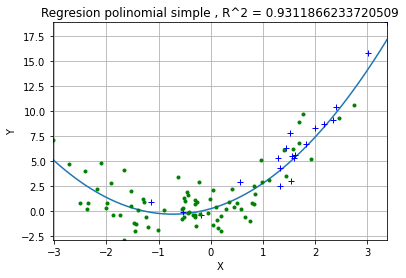

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

n_datos=100
X=[]
y=[]
X_np = np.linspace(-2, 2, n_datos) + np.random.randn(1,n_datos)[0] * 1.0
y_np = 0.4 +1.5 * X_np +1 * (X_np**2) +np.random.randn(1,n_datos)[0] * 1.5

for i in np.arange(n_datos):
  X.append( [X_np[i]] )
  y.append( [y_np[i]] ) 

#Data de entrenamiento
X_train=X[0:80]
y_train=y[0:80]


#### Probar     print(X_train[1])

#Data de teste
X_test=X[80:100]
y_test=y[80:100]

quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
#### Probar     print(X_train_quadratic[1])
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
parametros=regressor_quadratic.coef_
a=regressor_quadratic.intercept_[0]
b_1=parametros[0][1]
b_2=parametros[0][2]
print('coeficiente independiente: '+ str(a))
print('Coeficiente de la primera variable explicativa: ' + str(b_1))
print('Coeficiente de la segunda variable explicativa: ' + str(b_2))

prediccion=regressor_quadratic.predict(X_test_quadratic)
R_2=regressor_quadratic.score(X_test_quadratic, y_test)

maxX=max(X_np)
minX=min(X_np)

maxY=max(y_np)
minY=min(y_np)

xx = np.linspace(minX, maxX, 100)
yy = a + b_1*xx + b_2*(xx**2)

plt.plot(xx,yy)
plt.plot(X_test,y_test , 'b+')
plt.plot(X_train,y_train , 'g.')
plt.title('Regresion polinomial simple , R^2 = '+str(R_2))
plt.xlabel('X')
plt.ylabel('Y')
plt.axis([minX, maxX, minY, maxY])
plt.grid(True)
plt.show()

### 3.1.1 Ejemplo 2

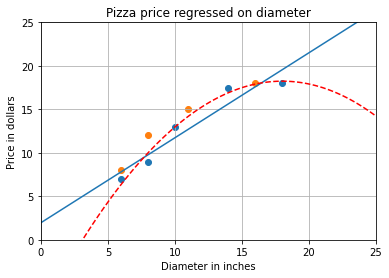

Simple linear regression r-squared 0.809726797707665
Quadratic regression r-squared 0.8675443656345054


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#Datos para la regresion
X_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
X_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]

#Grafica de la regresion lineal
regressor = LinearRegression()
regressor.fit(X_train, y_train)
xx = np.linspace(0, 26, 100)
###Prediccion=model.predict([[NewDiametro]])### ,ver colab 2
###print(xx.reshape(xx.shape[0], 1))###
yy = regressor.predict(xx.reshape(xx.shape[0], 1))
plt.plot(xx, yy)


#Grafica de la regresion polinomial grado 2
quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.shape[0], 1))



plt.plot(xx, regressor_quadratic.predict(xx_quadratic), c='r',linestyle='--')
plt.title('Pizza price regressed on diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.show()
print ('Simple linear regression r-squared', regressor.score(X_test, y_test))
print ('Quadratic regression r-squared', regressor_quadratic.
score(X_test_quadratic, y_test))

## 3.2 Optimizacion Machine learning ( Descenso de gradiente )

In [1]:
import numpy as np
n_datos=100

X = np.linspace(0, 2, n_datos) + np.random.randn(1,n_datos)[0] * 0.33
y = 3 +1.5 * X +5 * (X**2) + np.random.randn(1,n_datos)[0] * 0.6

#Data de entrenamiento
X_train=X[0:80]
y_train=y[0:80]

#Data de teste
X_test=X[80:100]
X_test=X[80:100]
y_test=y[80:100]


In [9]:
#Optimizacion por Gradiente Descendente

# Definición de los ajustes y parámetros iniciales
num_steps = 10000
learningRate = 0.1
criteria = 1e-8
a = 1
b_1 = 1
b_2 = 1
# Proceso iterativo
for step in range(0, num_steps):
    a_gradient = 0
    b_1_gradient = 0
    b_2_gradient = 0
    N = float(len(X_train))
    for i in range(0, len(X_train)):
        a_gradient   -= (2/N) * (y_train[i] - (   a + b_1 * X_train[i]+b_2 * (X_train[i]**2)   ) )
        b_1_gradient -= (2/N) * (y_train[i] - (   a + b_1 * X_train[i]+b_2 * (X_train[i]**2)   ) ) * X_train[i]
        b_2_gradient -= (2/N) * (y_train[i] - (   a + b_1 * X_train[i]+b_2 * (X_train[i]**2)   ) ) * (X_train[i]**2)


    a = a - (learningRate * a_gradient)
    b_1 = b_1 - (learningRate * b_1_gradient)
    b_2 = b_2 - (learningRate * b_2_gradient)
    if max(abs(learningRate * a_gradient), abs(learningRate * b_1_gradient) , abs(learningRate * b_2_gradient) ) < criteria:
        break
    
# Resultados
print('Resultados en '+str(step)+ ' pasos')
print('Tangente 1 :',b_1)
print('Tangente 2 :',b_2)
print('Coeficiente independiente:',a)

Resultados en 1079 pasos
Tangente 1 : 1.6257215552536637
Tangente 2 : 4.892630577483088
Coeficiente independiente: 3.1082942595612972


# 3. Regresion Polinomial multivariable

La regresion polinomial multivariada , usa de variables explicativas ($x_1 , x_2 , ... ,x_n$ ) para poder describir la variables respuesta ( $y$ ). Este tipo de regresion agrega combinaciones al modelo que le genera una robustes.

Por ejemplo para regresion polinomial con $x_1$ y $x_2$ el modelo es:

\begin{equation}
y=a+b_1x_1+b_2x_1^2+b_3x_2+b_4x_2^2+b_5x_1x_2
\end{equation}


El nuevo termino $x_1x_2$ , es llamado interaccion. Con $n$ predictores se tiene un intercepto, $n$ terminos lineales, $n$ terminos cuadraticos y
$n (n + 1) /2$ terminos de interaccion. Si $n = 5$ se tienen 26 terminos y con
n = 10 se tienen 76 terminos.

Este modelo lo podemos expresar de manera matricial:

\begin{equation}
Y=XB
\end{equation}


\begin{equation}
\begin{bmatrix}
y_1 \\
y_2  \\
.\\
.\\
. \\
y_m
\end{bmatrix}
=
\begin{bmatrix}
a+b_1x_{11}+b_2x_{11}^2+b_3x_{21}+b_4x_{21}^2+b_5x_{11}x_{21}\\
a+b_1x_{12}+b_2x_{12}^2+b_3x_{22}+b_4x_{22}^2+b_5x_{12}x_{22}\\
.\\
.\\
.\\
a+b_1x_{1m}+b_2x_{1m}^2+b_3x_{2m}+b_4x_{2m}^2+b_5x_{1m}x_{2m}
\end{bmatrix}
=
\begin{bmatrix}
1 &x_{11}& x_{11}^2 & x_{21} &x_{21}^2 &x_{11}x_{21} \\
1 &x_{12}& x_{12}^2 & x_{22} &x_{22}^2 &x_{12}x_{22}\\
. & . & . & . & .& .\\
. & . & . & . & .& .\\
. & . & . & . & .& .\\
1 &x_{1m}& x_{1m}^2 & x_{2m} &x_{2m}^2 &x_{1m}x_{2m} 
\end{bmatrix}
X
\begin{bmatrix}
a \\
b_1 \\
b_2 \\
b_3\\
b_4\\
b_5
\end{bmatrix}
    .......(1)
\end{equation}


Una vez planteado el modelo a utilizar , se debera encontrar los parametros que le corresponde. Para la regresion polinomial simple consiste en conocer la matriz $B$.

De la expresion $(1)$ antes mencionada tenemos:
\begin{equation}
B=(X^T X)^{-1}X^T Y
\end{equation}

Esta expresion es hallada al minimizar la funcion de coste

$SS_{res}={\sum_{i=1}^n}(y_i-f(x_1,x_2,...,x_n))^2$